In [1]:
import copy
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from pre_processing import *
from algorithms import *
from spectrum_gen import *
from data_gen import *
from analysis import *
from datasets import *
from evaluation import *
#cr_filtering()
#cr_read_norm()1dasdas
import h5py
import scanpy as sc
from sinkhorn_knopp import sinkhorn_knopp as skp
from sklearn.metrics import adjusted_rand_score
gene='pck1'
up_lim=3.5
n_obs=1400
direction = 'up'

In [2]:
adata = read_liver_data_2(n_obs=n_obs)
adata = sort_data_crit(adata=copy.deepcopy(adata.copy()),crit='ZT',crit_list=['0','6','12','18'])
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_

View of AnnData object with n_obs × n_vars = 5600 × 14812
    obs: 'ZT', 'layer', 'batch'

Trying to set attribute `.var` of view, copying.


Starting nborm: 3371.945


/Users/jonathankarin/.conda/envs/project/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'ZT' as categorical


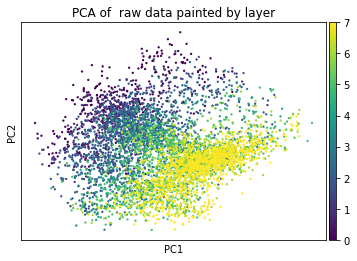

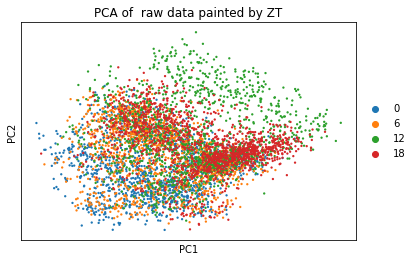

Spearman
SpearmanrResult(correlation=0.2216367880191528, pvalue=2.8247549017758575e-63)
1111


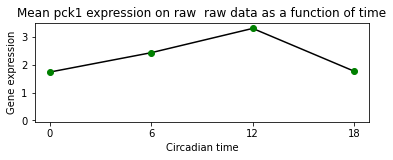

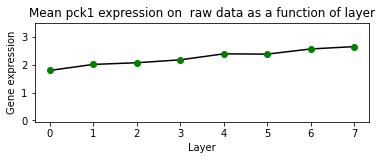

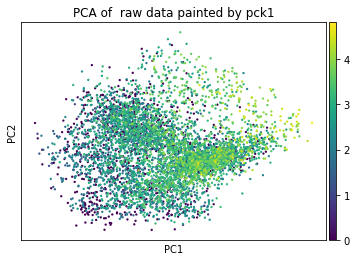

In [3]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes=7000)
print("Starting nborm: " +str(np.linalg.norm(adata.X)))
plots_liver(adata,title=" raw data")
print("Spearman")
print(corr_rank(adata,gene,direction))
plt_mean_gene_liver(adata,gene , up_lim=up_lim , title = " raw data" , color='g')
adata.write(filename="liver_raw.h5ad")
orig_adata = copy.deepcopy(adata.copy())


In [ ]:
adata_cyclic_filtered = copy.deepcopy(orig_adata.copy())
F = filtering_cyclic(adata_cyclic_filtered.X, regu=0, iterNum=300, verbosity=25)
adata_cyclic_filtered.X = adata_cyclic_filtered.X * F
plots_liver(adata_cyclic_filtered,title=" cyclic filtering")
print("Spearman")
print(corr_rank(adata_cyclic_filtered,gene,direction))
plt_mean_gene_liver(adata_cyclic_filtered,gene , up_lim=up_lim , title = " cyclic filtering" , color='r')
print("Norm change: " +str(np.linalg.norm(orig_adata.X-adata_cyclic_filtered.X)))
adata_cyclic_filtered.write(filename="liver_cyclic_filtered.h5ad")

starting filtering
25th Iteration    Loss :: 4515.549601354485 gradient :: 63.43151872345377


In [ ]:
adata_cyclic_enhancment = copy.deepcopy(orig_adata.copy())
D = filter_non_cyclic_genes_line(adata_cyclic_enhancment.X, regu=0.5,iterNum=25)
adata_cyclic_enhancment.X = adata_cyclic_enhancment.X.dot(D)
F =enhancement_cyclic(adata_cyclic_enhancment.X, regu=0.01 ,iterNum=100)
adata_cyclic_enhancment.X = adata_cyclic_enhancment.X * F
plots_liver(adata_cyclic_enhancment,title=" cyclic enhancement")
print("Spearman")
print(corr_rank(adata_cyclic_enhancment,gene,direction))
plt_mean_gene_liver(adata_cyclic_enhancment,gene , up_lim=up_lim , title = " cyclic enhancement" , color='y')
print("Norm change: " +str(np.linalg.norm(orig_adata.X-adata_cyclic_enhancment.X)))
adata_cyclic_enhancment.write(filename="liver_cyclic_enhancement.h5ad")


In [ ]:
linear_adata = copy.deepcopy(orig_adata.copy())
linear_adata = sort_data_linear(linear_adata)
adata_linear_filtered = linear_adata.copy()
F =filter_linear_full(adata_linear_filtered.X, regu=75 ,iterNum=10,method = 'numeric')
adata_linear_filtered.X = adata_linear_filtered.X * F

plots_liver(adata_linear_filtered,title=" linear filtering")
print("Spearman")
print(corr_rank(adata_linear_filtered,gene,direction))
plt_mean_gene_liver(adata_linear_filtered,gene , up_lim=up_lim , title = " linear filtering" , color='cyan')
print("Norm change: " +str(np.linalg.norm(linear_adata.X-adata_linear_filtered.X)))
adata_linear_filtered.write(filename="liver_linear_filtering.h5ad")


In [ ]:
adata_linear_enhanced = linear_adata.copy()
F_en = np.ones(F.shape)-F
adata_linear_enhanced.X = adata_linear_enhanced.X * F_en
plots_liver(adata_linear_enhanced,title=" linear enhancement")
print("Spearman")
print(corr_rank(adata_linear_enhanced,gene,direction))
plt_mean_gene_liver(adata_linear_enhanced,gene , up_lim=up_lim , title = " linear enhancement" , color='orange')
print("Norm change: " +str(np.linalg.norm(linear_adata.X-adata_linear_enhanced.X)))
adata_linear_enhanced.write(filename="liver_linear_en.h5ad")
